# Simulazione d'esame Laboratorio di Programmazione 2

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

In [133]:
v = pd.array([720, 980, 650, 1200])

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

In [134]:
np.sum(v)

np.int64(3550)

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.

In [135]:
v2 = v.copy()
v2[3] = v2[3] + 0.12 * v2[3]
v2

<IntegerArray>
[720, 980, 650, 1344]
Length: 4, dtype: Int64

4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

In [136]:
v3 = v2.copy()
v3[2] = v3[2] - 0.1 * v3[2]
v3

<IntegerArray>
[720, 980, 585, 1344]
Length: 4, dtype: Int64

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

In [137]:
v4 = v3.copy()
v4[0] = v4[0] + 0.05 * v4[0]
v4[1] = v4[1] + 0.05 * v4[1]
v4

<IntegerArray>
[756, 1029, 585, 1344]
Length: 4, dtype: Int64

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

In [138]:
np.sum(v4)

np.int64(3714)

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

In [139]:
#devo confrontare 'v' e 'v2'
diff = np.sum(v2) - np.sum(v)
perc = diff * 100 / np.sum(v)
print(f"La spesa è aumentata del {perc:.2f}%")

La spesa è aumentata del 4.06%


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

In [140]:
def walk(n, N):
    m = np.zeros((N, n))
    media = np.array([])
    sd = np.array([])
    for passo in range(n):
        for riga in range(N):
            m[riga, passo] = m[riga, passo] + np.random.choice([-1, 1])
        media = np.append(media, np.mean(m[:,passo]))
        sd = np.append(sd, np.std(m[:,passo]))
    return (media, sd)

print(walk(5, 4))
    


(array([-1. , -0.5,  0. ,  0. ,  0. ]), array([0.       , 0.8660254, 1.       , 1.       , 1.       ]))


2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

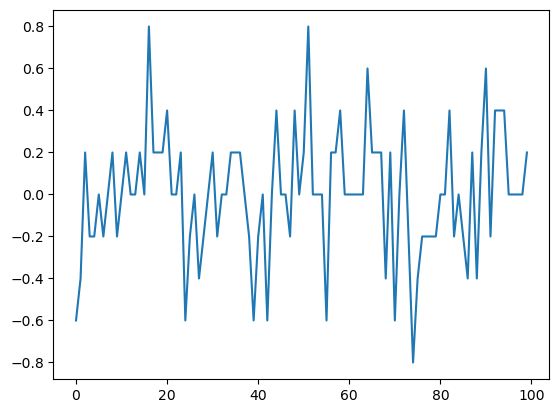

In [141]:
plt.plot(walk(100, 10)[0])
plt.show()

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

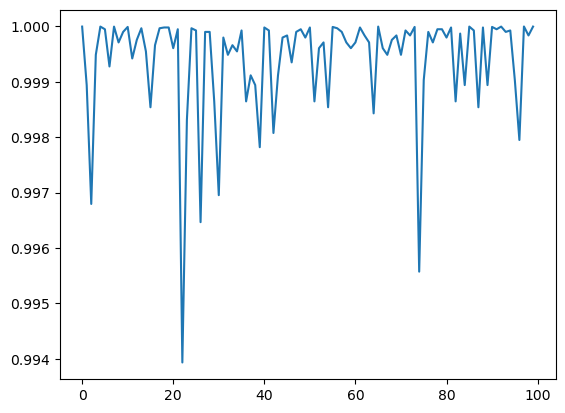

0.9329455663367638
0.994381327041604
0.9994944912198424
0.999371714774305


In [148]:
dati = walk(100, 1000)
plt.plot(dati[1])
plt.show()
# media deviazione std con 10, 100, 1000 e 1000 camminatori (N)
for N in ([10, 100, 1000, 1000]):
    print(np.mean(walk(100, N)[1]))
# vediamo che effettivamente diminuisce, cioè si avvicina a 1, all'aumentare del campione

## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [ ]:
np.random.seed(42)
a = np.random.normal(0, 1, [5, 9])
b = np.array([])
for line in a:


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.
